In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [6]:
# Leer datos

df = pd.read_csv('data/retail_store_inventory.csv')
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [7]:
# Rango del dataset

df["Date"].min(), df["Date"].max()

('2022-01-01', '2024-01-01')

In [11]:
# Número de tiendas

print(df["Store ID"].nunique())

# Número de productos

print(df["Product ID"].nunique())

5
20


In [16]:
193+85-58

220

In [22]:
df[df["Inventory Level"] == df["Units Sold"]]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
137,2022-01-02,S002,P0018,Groceries,East,124,124,46,116.05,21.07,10,Sunny,0,21.71,Autumn
301,2022-01-04,S001,P0002,Electronics,North,91,91,142,82.65,88.22,15,Sunny,1,87.44,Autumn
563,2022-01-06,S004,P0004,Electronics,North,50,50,180,41.93,83.19,10,Snowy,1,88.18,Winter
646,2022-01-07,S003,P0007,Groceries,South,177,177,169,189.57,40.45,10,Sunny,1,41.65,Summer
802,2022-01-09,S001,P0003,Toys,East,153,153,107,147.91,18.67,5,Sunny,1,19.14,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72043,2023-12-22,S003,P0004,Furniture,West,161,161,100,172.91,16.66,20,Rainy,0,15.15,Spring
72160,2023-12-23,S004,P0001,Electronics,East,64,64,135,62.45,39.52,15,Cloudy,1,38.93,Spring
72187,2023-12-23,S005,P0008,Electronics,North,60,60,52,59.49,73.79,10,Cloudy,1,70.39,Summer
72678,2023-12-28,S004,P0019,Toys,West,160,160,60,167.96,18.39,20,Rainy,0,16.10,Summer


In [29]:
sample = df[(df["Product ID"] == "P0003") & (df["Store ID"] == "S001") & (df["Region"]=="East") & (df["Category"]=="Toys")]
sample.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
802,2022-01-09,S001,P0003,Toys,East,153,153,107,147.91,18.67,5,Sunny,1,19.14,Autumn
1302,2022-01-14,S001,P0003,Toys,East,91,61,150,57.11,53.89,20,Cloudy,0,49.41,Spring
1702,2022-01-18,S001,P0003,Toys,East,203,70,147,78.83,82.71,15,Sunny,0,86.78,Spring
5302,2022-02-23,S001,P0003,Toys,East,298,169,44,183.32,79.42,10,Sunny,0,75.46,Summer
8402,2022-03-26,S001,P0003,Toys,East,348,156,26,150.45,99.41,0,Snowy,0,98.01,Summer


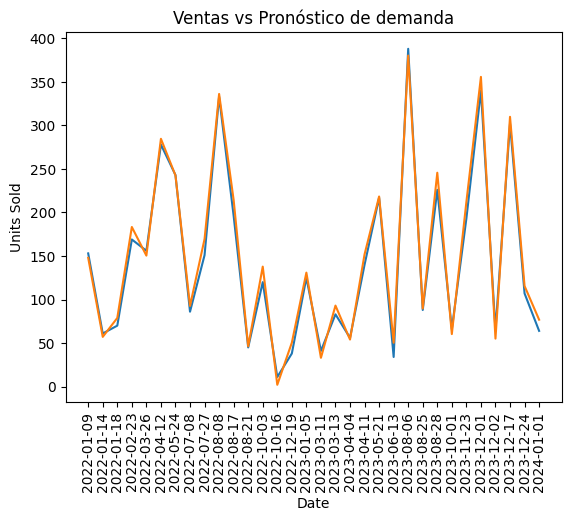

In [28]:
sns.lineplot(data=sample, x="Date", y="Units Sold")
sns.lineplot(data=sample, x="Date", y="Demand Forecast")
plt.xticks(rotation=90)
plt.title("Ventas vs Pronóstico de demanda")
plt.show()

In [33]:
# Revisar los stockouts

stockouts = sample[sample["Inventory Level"] == sample["Units Sold"]]
stockouts

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
802,2022-01-09,S001,P0003,Toys,East,153,153,107,147.91,18.67,5,Sunny,1,19.14,Autumn


* Preguntas

Si hemos vendido todo lo que teníamos en inventario, puede ser que nuestra demanda haya sido mayor que nuestra venta; pero entonces, ¿por qué ofrecimos descuento? ¿O es que nuestra demanda fue mayor justamente porque ofrecimos descuento? ¿Es esto un problema? Si lo es, ¿qué debemos hacer?

Haz una propuesta de soluciones (casos de uso) que podrías resolver mediante cualquiera de los enfoques de la analítica de datos. Conversemos en clase acerca de las soluciones.

¿Qué datos necesitamos para desarrollar las soluciones que proponen?